In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
file = 'datasets/TimeSeries.txt'

df = pd.read_csv(file, parse_dates=['date'], index_col='date')
df.dropna()

df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


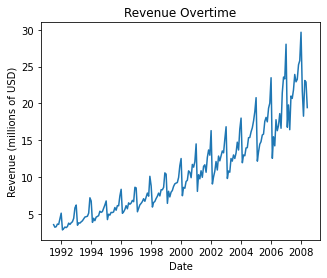

In [60]:
plt.figure(figsize=(5,4))
plt.plot(df['value'])
plt.title('Revenue Overtime')
plt.xlabel('Date')
plt.ylabel('Revenue (millions of USD)')
plt.show()

In [61]:
#check for stationarity 

from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df, autolag = 'AIC')
print("1. ADF Test Statistic: ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2]) 
print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)
    
print('Stationary data should have p-value < 0.05, and the critical values \nshould be close to the test statistic, therefore this dataset is not \nstationary.')

1. ADF Test Statistic:  3.1451856893067434
2. P-Value :  1.0
3. Num Of Lags :  15
4. Num Of Observations Used For ADF Regression: 188
5. Critical Values :
	 1% :  -3.465620397124192
	 5% :  -2.8770397560752436
	 10% :  -2.5750324547306476
Stationary data should have p-value < 0.05, and the critical values 
should be close to the test statistic, therefore this dataset is not 
stationary.


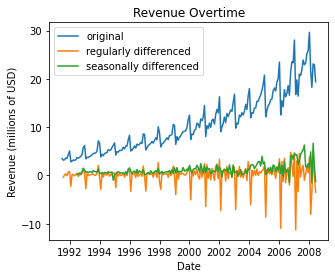

In [73]:
#to make the data stationary, I use seasonal differencing

plt.figure(figsize=(5,4))
plt.plot(df['value'], label='original')
plt.plot(df['value'].diff(), label='regularly differenced')
#the data is spaced by intervals of 1 month, so diff(12)
#takes a period of 1 year, subtracts each point from
#the point 12 months back
plt.plot(df['value'].diff(12), label='seasonally differenced')
plt.title('Revenue Overtime')
plt.xlabel('Date')
plt.ylabel('Revenue (millions of USD)')
plt.legend(loc='upper left')
plt.show()

In [75]:
#test again for stationarity 

df_seasonal = df.copy()

df_seasonal['value'] = df_seasonal['value'].diff(12)

# Drop NaN values introduced by differencing
df_seasonal = df_seasonal.dropna()


dftest2 = adfuller(df_seasonal, autolag = 'AIC')
print("1. ADF Test Statistic: ",dftest2[0])
print("2. P-Value : ", dftest2[1])
print("3. Num Of Lags : ", dftest2[2]) 
print("4. Num Of Observations Used For ADF Regression:",      dftest2[3])
print("5. Critical Values :")
for key, val in dftest2[4].items():
    print("\t",key, ": ", val)


1. ADF Test Statistic:  -2.092722659642395
2. P-Value :  0.24745090770394584
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression: 178
5. Critical Values :
	 1% :  -3.467631519151906
	 5% :  -2.8779183721695567
	 10% :  -2.575501353364474


In [77]:
# initiate instance of seasonal arima with auto_arima

#!pip install pmdarima
from pmdarima import auto_arima


# Seasonal - fit stepwise auto-ARIMA
smodel = auto_arima(df, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic


/Users/marioalpizar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=534.818, Time=0.61 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=624.061, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=596.068, Time=0.24 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=611.475, Time=0.16 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=757.274, Time=0.02 sec


/Users/marioalpizar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/marioalpizar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=559.407, Time=0.12 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.88 sec


/Users/marioalpizar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=536.817, Time=2.88 sec


/Users/marioalpizar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=543.106, Time=0.50 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=537.706, Time=3.85 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=594.467, Time=0.15 sec


/Users/marioalpizar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=529.829, Time=0.52 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=555.198, Time=0.14 sec


/Users/marioalpizar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AIC=531.168, Time=2.05 sec


/Users/marioalpizar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(1,1,0)[12] intercept   : AIC=534.757, Time=0.49 sec
 ARIMA(2,0,1)(1,1,2)[12] intercept   : AIC=524.190, Time=4.65 sec
 ARIMA(2,0,1)(2,1,2)[12] intercept   : AIC=533.034, Time=4.19 sec
 ARIMA(2,0,1)(2,1,1)[12] intercept   : AIC=531.730, Time=4.45 sec
 ARIMA(2,0,0)(1,1,2)[12] intercept   : AIC=545.610, Time=4.13 sec
 ARIMA(3,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=4.77 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=528.565, Time=4.44 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=593.876, Time=2.14 sec
 ARIMA(1,0,2)(1,1,2)[12] intercept   : AIC=524.258, Time=4.41 sec
 ARIMA(3,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=3.76 sec
 ARIMA(3,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=5.06 sec
 ARIMA(2,0,1)(1,1,2)[12]             : AIC=522.352, Time=2.91 sec
 ARIMA(2,0,1)(0,1,2)[12]             : AIC=532.149, Time=1.19 sec
 ARIMA(2,0,1)(1,1,1)[12]             : AIC=inf, Time=0.91 sec
 ARIMA(2,0,1)(2,1,2)[12]             : AIC=inf, Time=4.77 sec
 ARIMA(2,0,1)(0,1,1)[12]      

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  204
Model:             SARIMAX(2, 0, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -254.176
Date:                                 Tue, 28 Nov 2023   AIC                            522.352
Time:                                         18:27:58   BIC                            545.155
Sample:                                     07-01-1991   HQIC                           531.588
                                          - 06-01-2008                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6750      0.068      9.957      0.000       0.542       0.808
ar.L2          0.3149      0.063      4.994      0.000       0.191       0.439
ma.L1         -0.6390      0.062    -10.332      0.000      -0.760      -0.518
ar.S.L12       0.8484      0.152      5.576      0.000       0.550       1.147
ma.S.L12      -1.5857      0.174     -9.126      0.000      -1.926      -1.245
ma.S.L24       0.7618      0.109      6.980      0.000       0.548       0.976
sigma2         0.7455      0.068     10.988      0.000       0.613       0.879
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               197.88
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):              15.44   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

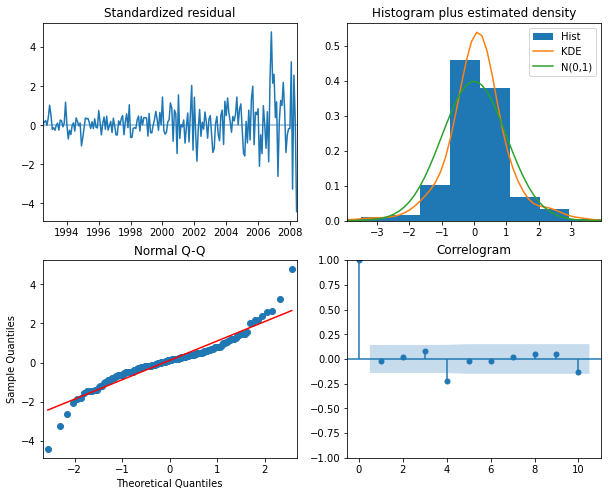

In [93]:
# Forecast for 2 years
n_periods = 36
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df.index[-1], periods = n_periods, freq='MS')


smodel.plot_diagnostics(figsize=(10,8))
plt.show()

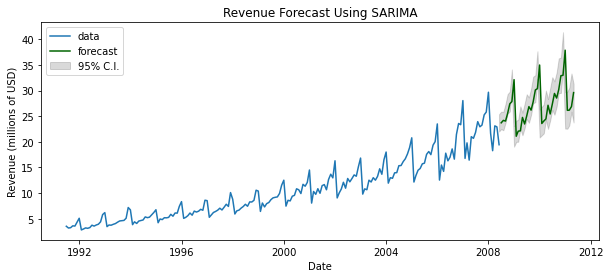

In [95]:
# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(10,4))
plt.plot(df, label='data')
plt.plot(fitted_series, color='darkgreen', label='forecast')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15, label='95% C.I.')

plt.title("Revenue Forecast Using SARIMA")
plt.xlabel('Date')
plt.ylabel('Revenue (millions of USD)')
plt.legend(loc='upper left')
plt.show()